In [2]:
import datetime
import pandas as pd

In [20]:
import datetime

In [7]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

UsageError: Line magic function `%install_ext` not found.


In [15]:
sample_hh = pd.read_csv('BG-NBD_sample_data.csv')

In [16]:
sample_hh.head()

,household_id,frequency_15,recency_15,t_15,frequency,recency,T,dot_app_flag,app_flag,act_orders_17
0,652413498,37,340,352,82,676,688,NaN,1,32
1,432715280,2,228,331,12,615,718,1.0,1,0
2,841037356,1,20,112,14,591,683,NaN,1,16
3,743444648,192,326,363,370,689,726,NaN,1,0
4,23248937,84,357,362,172,722,727,NaN,1,188


### Model building

In [17]:
%%time
from lifetimes import BetaGeoFitter
# similar API to scikit-learn and lifelines.
bgf = BetaGeoFitter()
bgf.fit(sample_hh['frequency'], sample_hh['recency'], sample_hh['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 500 subjects, a: 4586.45, alpha: 9.63, b: 9474645.54, r: 1.62>
Wall time: 619 ms


In [18]:
### Saving the model
bgf.save_model('bgf_2yrs_stores_day_lvl_app_hh.pkl')

In [21]:
### Loading the model
start=datetime.datetime.now()
bgf_loaded = BetaGeoFitter()
bgf_loaded.load_model('bgf_2yrs_stores_day_lvl_app_hh.pkl')
bgf_loaded
end=datetime.datetime.now()
print (end-start)

0:00:00.013007


## Visualizing our Frequency/Recency Matrix

In [22]:
%%time
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf)

C:\Anaconda3\lib\site-packages\lifetimes\fitters\beta_geo_fitter.py:215: RuntimeWarning: overflow encountered in double_scalars
  ((alpha + T) / (alpha + recency)) ** (r + x)


Wall time: 22.8 s


Wall time: 249 ms


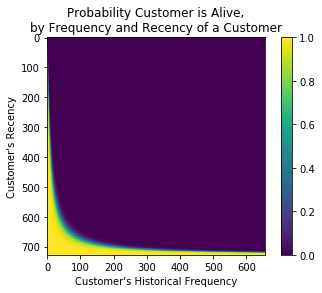

In [23]:
%%time
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(bgf)

In [24]:
## Predicting for next one year
t = 364
sample_hh['predicted_purchases_16'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, sample_hh['frequency'], sample_hh['recency'], sample_hh['T'])
sample_hh.sort_values(by='predicted_purchases_16').tail(5)

,household_id,frequency_15,recency_15,t_15,frequency,recency,T,dot_app_flag,app_flag,act_orders_17,predicted_purchases_16
290,224807876,180,361,363,374,724,726,0.0,1,185,177.490095
470,654594948,206,363,363,414,727,727,0.0,1,207,195.383853
95,500029143,248,363,363,429,727,727,NaN,1,136,202.078927
218,607268092,263,363,363,525,725,725,1.0,1,265,244.987752
298,713305394,317,363,363,654,727,727,NaN,1,205,299.677294


In [25]:
sample_hh['predicted_purchases_16'] = sample_hh['predicted_purchases_16'].fillna(0)

In [26]:
## Predicting for next 2 year
t = 728
sample_hh['predicted_purchases_16_17'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, sample_hh['frequency'], sample_hh['recency'], sample_hh['T'])
sample_hh.sort_values(by='predicted_purchases_16').tail(5)

,household_id,frequency_15,recency_15,t_15,frequency,recency,T,dot_app_flag,app_flag,act_orders_17,predicted_purchases_16,predicted_purchases_16_17
290,224807876,180,361,363,374,724,726,0.0,1,185,177.490095,339.681134
470,654594948,206,363,363,414,727,727,0.0,1,207,195.383853,372.249170
95,500029143,248,363,363,429,727,727,NaN,1,136,202.078927,384.350148
218,607268092,263,363,363,525,725,725,1.0,1,265,244.987752,460.875589
298,713305394,317,363,363,654,727,727,NaN,1,205,299.677294,555.829294


In [27]:
sample_hh['predicted_purchases_16_17'] = sample_hh['predicted_purchases_16_17'].fillna(0)

In [28]:
sample_hh['predicted_purchases_17'] = sample_hh['predicted_purchases_16_17'].subtract(sample_hh['predicted_purchases_16'], fill_value=0)
sample_hh.sort_values(by='predicted_purchases_16').tail(5)

,household_id,frequency_15,recency_15,t_15,frequency,recency,T,dot_app_flag,app_flag,act_orders_17,predicted_purchases_16,predicted_purchases_16_17,predicted_purchases_17
290,224807876,180,361,363,374,724,726,0.0,1,185,177.490095,339.681134,162.191040
470,654594948,206,363,363,414,727,727,0.0,1,207,195.383853,372.249170,176.865317
95,500029143,248,363,363,429,727,727,NaN,1,136,202.078927,384.350148,182.271221
218,607268092,263,363,363,525,725,725,1.0,1,265,244.987752,460.875589,215.887837
298,713305394,317,363,363,654,727,727,NaN,1,205,299.677294,555.829294,256.152001


In [29]:
sample_hh['predicted_purchases_17'] = sample_hh['predicted_purchases_17'].fillna(0)

### Saving the final data

In [31]:
sample_hh.to_csv('final_pred_bgnbd.csv')

In [32]:
sample_hh.head()

,household_id,frequency_15,recency_15,t_15,frequency,recency,T,dot_app_flag,app_flag,act_orders_17,predicted_purchases_16,predicted_purchases_16_17,predicted_purchases_17
0,652413498,37,340,352,82,676,688,NaN,1,32,43.077602,85.244975,42.167373
1,432715280,2,228,331,12,615,718,1.0,1,0,6.774427,13.524931,6.750505
2,841037356,1,20,112,14,591,683,NaN,1,16,8.154125,16.273876,8.119750
3,743444648,192,326,363,370,689,726,NaN,1,0,0.001705,0.003264,0.001559
4,23248937,84,357,362,172,722,727,NaN,1,188,83.893561,164.357659,80.464098
